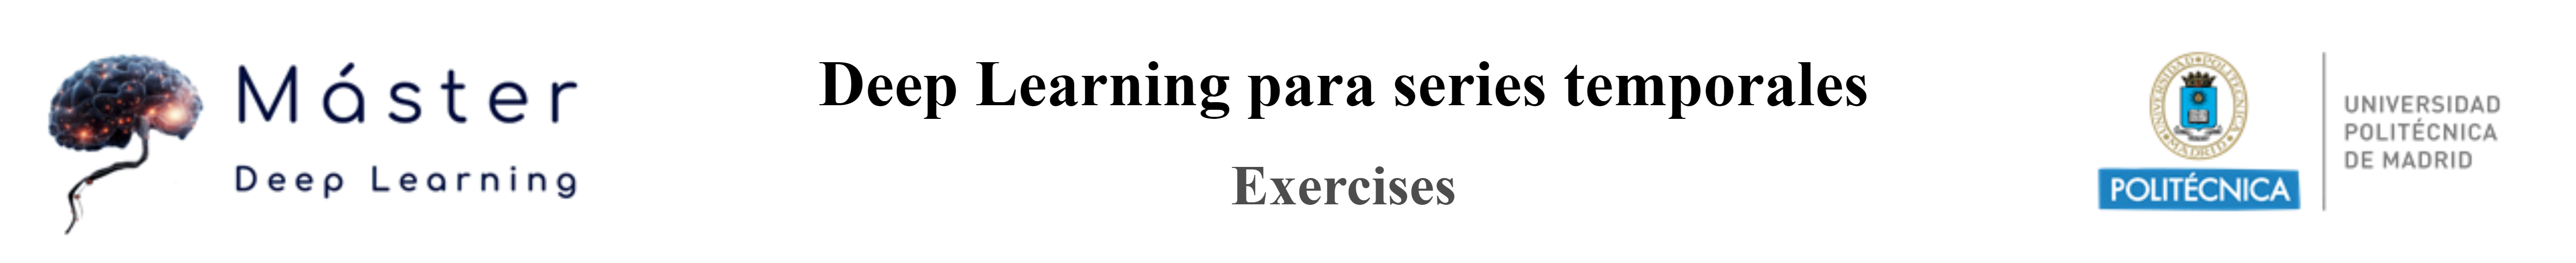

# Time Series | Part II: Preprocessing and analysis

In [ ]:
#! pip install aeon
#! pip install "pydantic<2" --force-reinstall
#! pip install pandas_profiling
#! pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.6
    Uninstalling pydantic-2.10.6:
      Successfully uninstalled pydantic-2.10.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport --> Deprecated
import ydata_profiling as ydp

ModuleNotFoundError: No module named 'ydata_profiling'

# Univariate real-world time series exploratory analysis: Kohl's
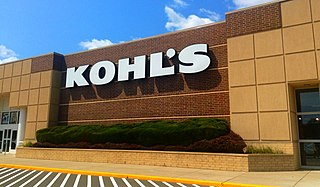

This part analyzes the dataset descripted at [Stumpy - Time series Chains tutorial](https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html). The time series displays ten years of web query volume for the keyword [Kohl's](https://www.kohls.com/) (an American retail chain, [Wikipedia](https://es.wikipedia.org/wiki/Kohl's)) from 2004 to 2014.


## ETL
To understand the data we need to see it, let's start with the data extraction, transform and load.

### Extract
The dataset is given as a .csv through zenodo. So, we must download it using ``! wget``.

In [ ]:
kohls_filename = "Time_Series_Chains_Kohls_data"
kohls_extension = "csv"
kohls_url = f"https://zenodo.org/record/4276348/files/{kohls_filename}.{kohls_extension}"
! wget {kohls_url}

--2025-02-06 15:11:34--  https://zenodo.org/record/4276348/files/Time_Series_Chains_Kohls_data.csv
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/4276348/files/Time_Series_Chains_Kohls_data.csv [following]
--2025-02-06 15:11:35--  https://zenodo.org/records/4276348/files/Time_Series_Chains_Kohls_data.csv
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 4671 (4.6K) [text/plain]
Saving to: ‘Time_Series_Chains_Kohls_data.csv’

Time_Series_Chains_ 100%[===================>]   4.56K  --.-KB/s    in 0.04s   

2025-02-06 15:11:35 (111 KB/s) - ‘Time_Series_Chains_Kohls_data.csv’ saved [4671/4671]



### Transform
Let's take a look into the data.

In [ ]:
! head -n 20 ./{kohls_filename}.{kohls_extension}

volume
0.010417
0.010417
0.010417
0.0
0.0
0.010417
0.010417
0.010417
0.010417
0.010417
0.020833
0.03125
0.010417
0.010417
0.010417
0.020833
0.010417
0.010417
0.020833


It contains only 1 column with time series data. Let's process the data to ensure all values ar floats and it contains no NaNs. If there is a Nan, we will transform it to 0. Check the webpage [Stumpy - Time series Chains tutorial](https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html) to see the frequency and the first date (you can use chatGPT as assistant and check his answer afterwards).

In [ ]:
kohls_ds = pd.read_csv(
    filepath_or_buffer = f"./{kohls_filename}.{kohls_extension}",
    delimiter = None,
    header = 0, # we got header 'volume' in first line
    index_col = None,
    usecols = [0], #Or None, the only one
    dtype = float
)

In [ ]:
kohls_ds.head()

,volume
0,0.010417
1,0.010417
2,0.010417
3,0.000000
4,0.000000


In [ ]:
start_date = "2004-01-01"
frequency = "1W"
kohls_ds.index = pd.date_range(start=start_date, periods=len(kohls_ds), freq=frequency)
kohls_ds.head()

,volume
2004-01-04,0.010417
2004-01-11,0.010417
2004-01-18,0.010417
2004-01-25,0.000000
2004-02-01,0.000000


In [ ]:
# Option 1: dropna() | what will happens with the deleted rows?
#print(f"Kohl_ds size before NaNs: ", kohl_ds.size)
#kohl_ds = kohl_ds.dropna()
#print(f"Kohl_ds size after NaNs: ", kohl_ds.size)

In [ ]:
# Option 2: fillna()
print(f"Kohls_ds NaNs count: ", kohls_ds.isna().sum().sum())
kohls_ds = kohls_ds.fillna(0)
print(f"Kohl_ds NaNs count after clean: ", kohls_ds.isna().sum().sum())

Kohls_ds NaNs count:  0
Kohl_ds NaNs count after clean:  0


### Load
Save the cleaned data into our database (the filesystem)

In [ ]:
# If using csv (bad efficience) --> Mostrar en ejemplo chiquito las dos opciones, aquí dejar sólo el feather
# kohl_ds.to_csv(f"./data/{kohl_filename}.csv", index=True, sep=",")

In [ ]:
kohls_ds.reset_index().to_feather(f"{kohls_filename}.ft")

In [ ]:
# Check the saved object
foo = pd.read_feather(f"{kohls_filename}.ft")
foo = foo.set_index("index")
foo.head()

,volume
index,
2004-01-04,0.010417
2004-01-11,0.010417
2004-01-18,0.010417
2004-01-25,0.000000
2004-02-01,0.000000


## EDA

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import itertools

In [ ]:
kohls_ds.head()

,volume
2004-01-04,0.010417
2004-01-11,0.010417
2004-01-18,0.010417
2004-01-25,0.000000
2004-02-01,0.000000


In [ ]:
weeks_in_year = int(np.floor(365/7))
print(weeks_in_year)

52


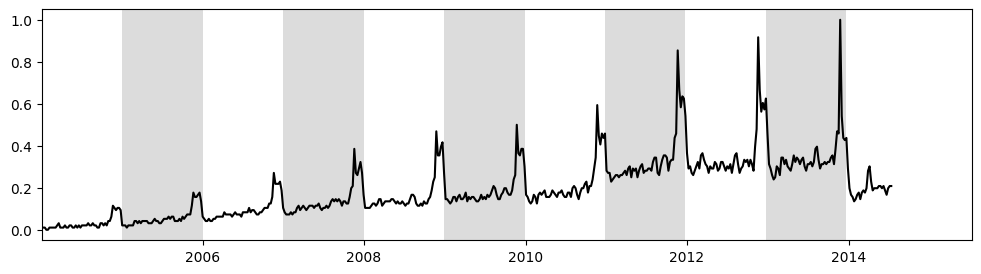

In [ ]:
plt.clf()
plt.close('all')

# Figure configuration
plt.figure(figsize=(12, 3))
plt.plot(kohls_ds['volume'], color='black')
plt.xlim(kohls_ds.index[0], kohls_ds.index[-1] + pd.Timedelta(weeks=weeks_in_year))

# Alternated colors for the rectangles
color = itertools.cycle(['white', 'gainsboro'])

# Rectangles
for i, x in enumerate(range(0, kohls_ds.shape[0], weeks_in_year)):
    rect_start = kohls_ds.index[x]
    rect_end = rect_start + pd.Timedelta(weeks=weeks_in_year)
    rect = Rectangle((rect_start, -1), pd.Timedelta(weeks=weeks_in_year), 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)


# Mostrar la gráfica
plt.show()


What are we seeing? How is the trend? Does the time series have specific behaviours? What does that behaviour refeers to?

All years seems similar. Lets show only 2009 (an a bit of 2010) nearer as an example. Put months instead of years

month:  4
year:  52


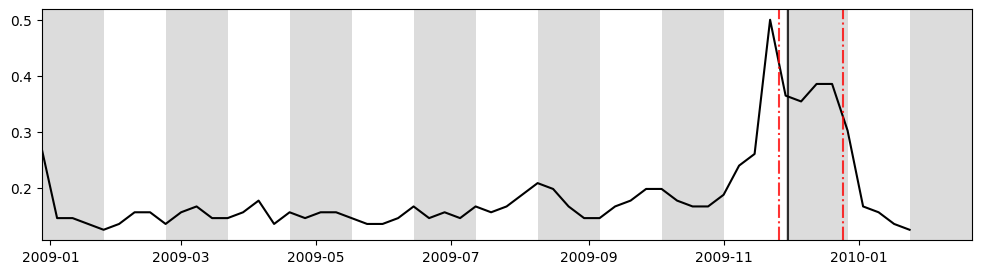

In [ ]:
weeks_in_month = int(30/7)
print("month: ", weeks_in_month)
print("year: ", weeks_in_year)
plt.clf()
plt.close('all')

# Figure configuration
plt.figure(figsize=(12, 3))
start_date = kohls_ds.index[weeks_in_year*5]
end_date = kohls_ds.index[weeks_in_year*6+weeks_in_month]
plt.plot(kohls_ds['volume'][start_date:end_date], color='black')
plt.xlim(start_date, end_date + pd.Timedelta(weeks=weeks_in_month))

# Alternated colors for the rectangles
color = itertools.cycle(['white', 'gainsboro'])

# Rectangles
for i, x in enumerate(range(0, kohls_ds.shape[0], weeks_in_month)):
    rect_start = kohls_ds.index[x]
    rect_end = rect_start + pd.Timedelta(weeks=weeks_in_month)
    rect = Rectangle((rect_start, -1), pd.Timedelta(weeks=weeks_in_month), 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)

# Dibujar las líneas verticales para fechas importantes
plt.axvline(x=pd.Timestamp('2009-12-25'), color='red', linestyle='-.', alpha=0.8)  # Navidad
plt.axvline(x=pd.Timestamp('2009-11-26'), color='red', linestyle='-.', alpha=0.8)  # Acción de Gracias
plt.axvline(x=pd.Timestamp('2009-11-30'), color='black', linestyle='-', alpha=0.8)  # Cyber Monday


# Mostrar la gráfica
plt.show()


The discovered chain shows that over the decade, the bump transitions from a smooth bump covering the period between Thanksgiving - last thursday in november - and Christmas - 25 december - , to a more sharply focused bump centered on Thanksgiving. This seems to reflect the growing importance of “Cyber Monday”, a marketing term for the Monday after Thanksgiving. The phrase was created by marketing companies to persuade consumers to shop online. The term made its debut on November 28th, 2005 in a press release entitled “Cyber Monday Quickly Becoming One of the Biggest Online Shopping Days of the Year”. Note that this date coincides with the first glimpse of the sharpening peak in our chain.

Stumpy's show with Data Mining techniques how this pattern repeats is year. Let's see what can we do with EDAS and if we can confirm the same conclusion through them.

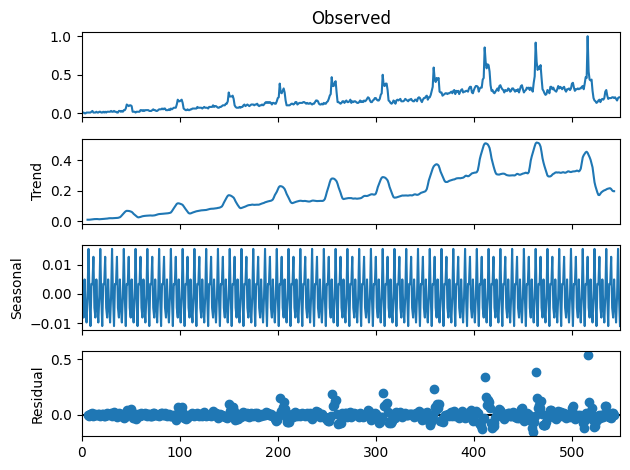

In [ ]:
# Little previous check
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(kohls_ds['volume'].values, model = 'additive', period = 12)
decomp.plot()
plt.show()

Most representative part is the trend, that tends to an upper trend, relaxed by the end of 2014 (could be interesting to check if there was an event that year or if we can get more data to check if its only the first month, maybe a n incomming crysis?)

Let's analyze the trend to look for the size between the patterns.

Number of NaNs in Trend: 12
Number of NaNs in First Difference (d_trend_t): 12
Number of NaNs in Second Difference (dd_trend_t): 12
Threshold: 0.006703594417845767


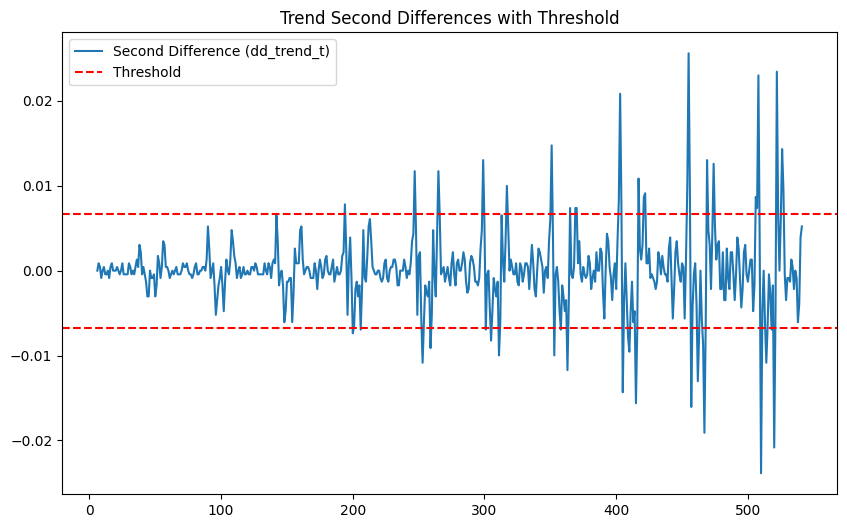

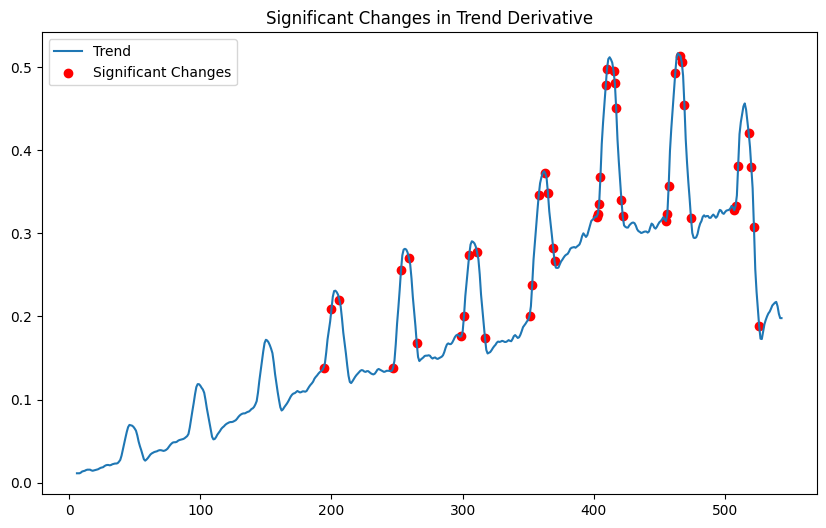

Indices of significant changes: [194 200 206 247 253 259 265 299 301 305 311 317 351 353 358 363 365 369
 370 402 403 404 405 409 410 415 416 417 421 422 455 456 457 462 466 467
 469 474 507 508 510 518 520 522 526]


In [ ]:
trend = decomp.trend
# d(trend)/dt
d_trend_t = np.diff(trend)
# d(d(trend)/dt)/dt
dd_trend_t = np.diff(d_trend_t)
dd_threshold = np.nanstd(dd_trend_t) * 1.5

# Contar NaNs en cada paso
print("Number of NaNs in Trend:", np.sum(np.isnan(trend)))
print("Number of NaNs in First Difference (d_trend_t):", np.sum(np.isnan(d_trend_t)))
print("Number of NaNs in Second Difference (dd_trend_t):", np.sum(np.isnan(dd_trend_t)))
print("Threshold:", dd_threshold)

plt.figure(figsize=(10, 6))
plt.plot(dd_trend_t, label="Second Difference (dd_trend_t)")
plt.axhline(y=dd_threshold, color="red", linestyle="--", label="Threshold")
plt.axhline(y=-dd_threshold, color="red", linestyle="--")
plt.legend()
plt.title("Trend Second Differences with Threshold")
plt.show()


indices = np.where((np.abs(dd_trend_t) > dd_threshold) & (d_trend_t[:-1]*d_trend_t[1:] > 0))[0]
#indices = indices[6:12]
plt.figure(figsize=(10, 6))
plt.plot(trend, label='Trend')
plt.scatter(indices, trend[indices], color='red', label='Significant Changes')
plt.legend()
plt.title("Significant Changes in Trend Derivative")
plt.show()

# Imprimir los índices detectados
print("Indices of significant changes:", indices)

Not twoo informative. Let's try from other perspective

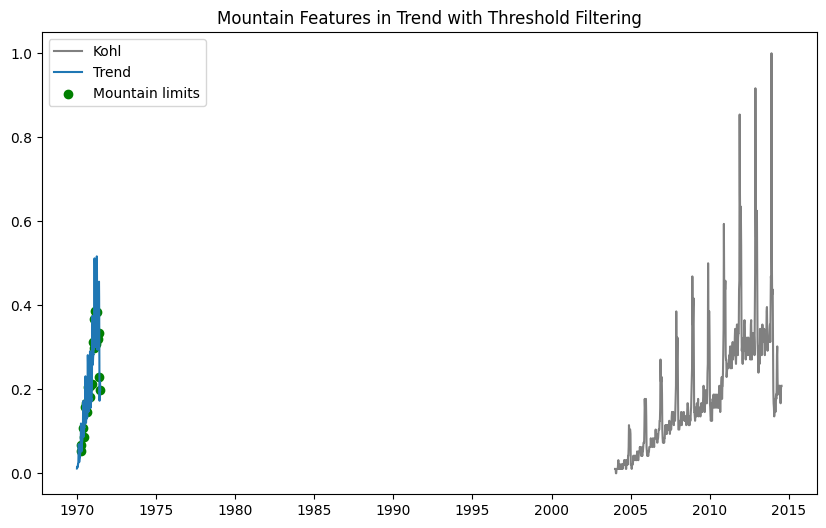

Mountain Indices: [86, 104, 138, 156, 190, 204, 242, 257, 294, 309, 346, 361, 389, 399, 413, 437, 450, 465, 488, 502, 518, 536]


In [ ]:
delta = 9
# Eliminar valores NaN de la tendencia
trend = trend[~np.isnan(trend)]

# Cálculo de diferencias
d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

# Establecer un umbral basado en la segunda derivada
dd_threshold = np.nanstd(dd_trend_t) * 0.8 # Ajusta el multiplicador según la sensibilidad deseada

raw_mountain_limits = [
    i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
    if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
]
mountain_limits = [raw_mountain_limits[0]]
for idx in raw_mountain_limits[1:]:
    if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
        mountain_limits.append(idx)


# Gráfica para visualizar los puntos detectados
plt.figure(figsize=(10, 6))
plt.plot(kohls_ds, label ='Kohl', color = 'gray')
plt.plot(trend, label='Trend')
plt.scatter(mountain_limits, trend[mountain_limits], color='green', label='Mountain limits')
plt.legend()
plt.title("Mountain Features in Trend with Threshold Filtering")
plt.show()

# Imprimir los índices detectados
print("Mountain Indices:", mountain_limits)


Ups. Something wrong in the plot, isn't it?

In [ ]:
trend_df = pd.DataFrame(trend)
trend_df.index = kohls_ds.index[:trend_df.shape[0]]
trend_df.head()

,0
2004-01-04,0.011285
2004-01-11,0.011285
2004-01-18,0.011285
2004-01-25,0.012153
2004-02-01,0.013455


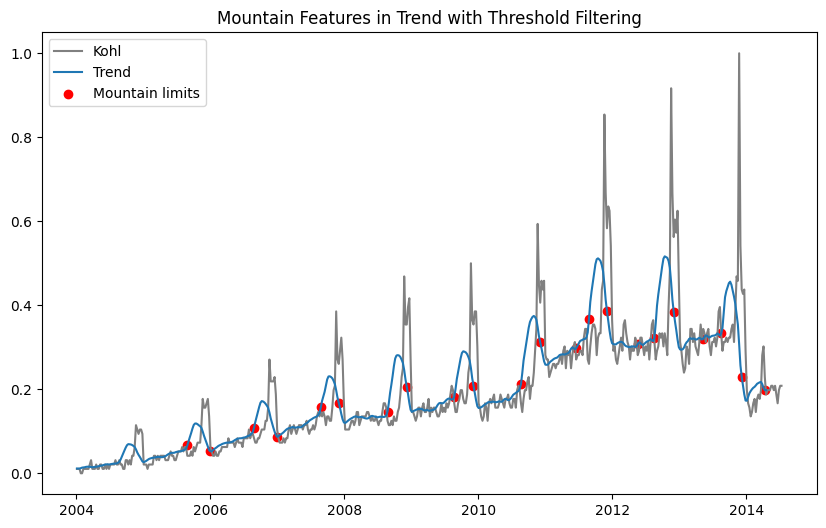

Mountain Indices: [86, 104, 138, 156, 190, 204, 242, 257, 294, 309, 346, 361, 389, 399, 413, 437, 450, 465, 488, 502, 518, 536]


In [ ]:
delta = 9
# Eliminar valores NaN de la tendencia
trend = trend[~np.isnan(trend)]

# Cálculo de diferencias
d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

# Establecer un umbral basado en la segunda derivada
dd_threshold = np.nanstd(dd_trend_t) * 0.8 # Ajusta el multiplicador según la sensibilidad deseada

raw_mountain_limits = [
    i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
    if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
]
mountain_limits = [raw_mountain_limits[0]]
for idx in raw_mountain_limits[1:]:
    if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
        mountain_limits.append(idx)

mountain_limits_indices = trend_df.index[mountain_limits]
# Gráfica para visualizar los puntos detectados
plt.figure(figsize=(10, 6))
plt.plot(kohls_ds, label ='Kohl', color = 'gray')
plt.plot(trend_df, label='Trend')
plt.scatter(mountain_limits_indices, trend[mountain_limits], color='red', label='Mountain limits')
plt.legend()
plt.title("Mountain Features in Trend with Threshold Filtering")
plt.show()

# Imprimir los índices detectados
print("Mountain Indices:", mountain_limits)


The trend clearly relates to the dataset, taking into account the trend, drift... that we forgot above

In [ ]:
drift = np.floor((kohls_ds.shape[0]-trend_df.shape[0])/2)
trend_df.index = trend_df.index+pd.Timedelta(weeks = drift)

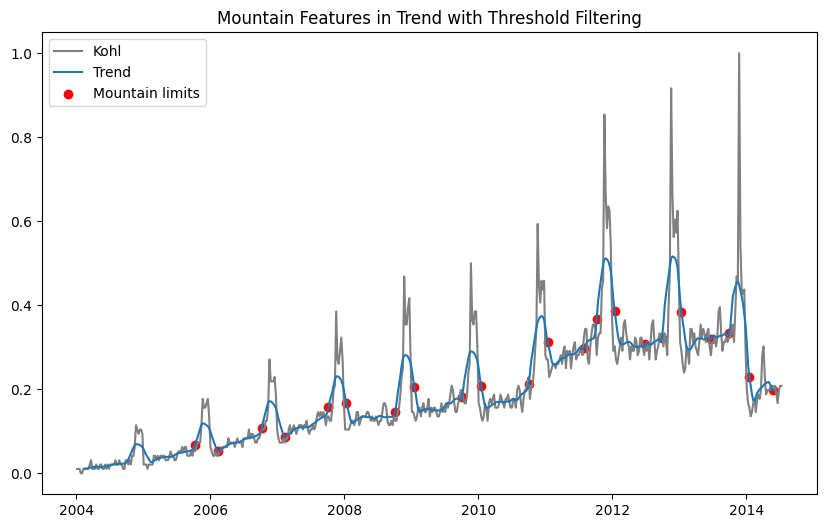

Mountain Indices: [86, 104, 138, 156, 190, 204, 242, 257, 294, 309, 346, 361, 389, 399, 413, 437, 450, 465, 488, 502, 518, 536]


In [ ]:
delta = 9
# Eliminar valores NaN de la tendencia
trend = trend[~np.isnan(trend)]

# Cálculo de diferencias
d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

# Establecer un umbral basado en la segunda derivada
dd_threshold = np.nanstd(dd_trend_t) * 0.8 # Ajusta el multiplicador según la sensibilidad deseada

raw_mountain_limits = [
    i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
    if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
]
mountain_limits = [raw_mountain_limits[0]]
for idx in raw_mountain_limits[1:]:
    if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
        mountain_limits.append(idx)

mountain_limits_indices = trend_df.index[mountain_limits]
# Gráfica para visualizar los puntos detectados
plt.figure(figsize=(10, 6))
plt.plot(kohls_ds, label ='Kohl', color = 'gray')
plt.plot(trend_df, label='Trend')
plt.scatter(mountain_limits_indices, trend[mountain_limits], color='red', label='Mountain limits')
plt.legend()
plt.title("Mountain Features in Trend with Threshold Filtering")
plt.show()

# Imprimir los índices detectados
print("Mountain Indices:", mountain_limits)

In [ ]:
# Most near are the first three mountains
m1 = mountain_limits[1]-mountain_limits[0]
m2 = mountain_limits[3]-mountain_limits[2]
m3 = mountain_limits[5]-mountain_limits[4]
print(f"Posible good distances: {m1}, {m2}, {m3}")

Posible good distances: 18, 18, 14


This are the dates of thanksgiving and cybermonday for those years, check if it is ok for the expected results


In [ ]:
import pandas as pd

# Función para calcular el cuarto jueves de noviembre (Thanksgiving)
def calculate_thanksgiving(year):
    # Empieza el 1 de noviembre del año dado
    nov_first = pd.Timestamp(f"{year}-11-01")
    # Encuentra el primer jueves (weekday = 3) y suma 3 semanas más
    thanksgiving = nov_first + pd.Timedelta(days=(3 - nov_first.weekday() + 7) % 7 + 21)
    return thanksgiving

# Función para calcular Cyber Monday (lunes después de Thanksgiving)
def calculate_cyber_monday(thanksgiving_date):
    return thanksgiving_date + pd.Timedelta(days=4)

# Generar las fechas para los años de interés
years = range(2004, 2014)
thanksgivings = [calculate_thanksgiving(year) for year in years]
cyber_mondays = [calculate_cyber_monday(thanksgiving) for thanksgiving in thanksgivings]

# Mostrar las fechas
print("Thanksgivings:", thanksgivings)
print("Cyber Mondays:", cyber_mondays)

Thanksgivings: [Timestamp('2004-11-25 00:00:00'), Timestamp('2005-11-24 00:00:00'), Timestamp('2006-11-23 00:00:00'), Timestamp('2007-11-22 00:00:00'), Timestamp('2008-11-27 00:00:00'), Timestamp('2009-11-26 00:00:00'), Timestamp('2010-11-25 00:00:00'), Timestamp('2011-11-24 00:00:00'), Timestamp('2012-11-22 00:00:00'), Timestamp('2013-11-28 00:00:00')]
Cyber Mondays: [Timestamp('2004-11-29 00:00:00'), Timestamp('2005-11-28 00:00:00'), Timestamp('2006-11-27 00:00:00'), Timestamp('2007-11-26 00:00:00'), Timestamp('2008-12-01 00:00:00'), Timestamp('2009-11-30 00:00:00'), Timestamp('2010-11-29 00:00:00'), Timestamp('2011-11-28 00:00:00'), Timestamp('2012-11-26 00:00:00'), Timestamp('2013-12-02 00:00:00')]


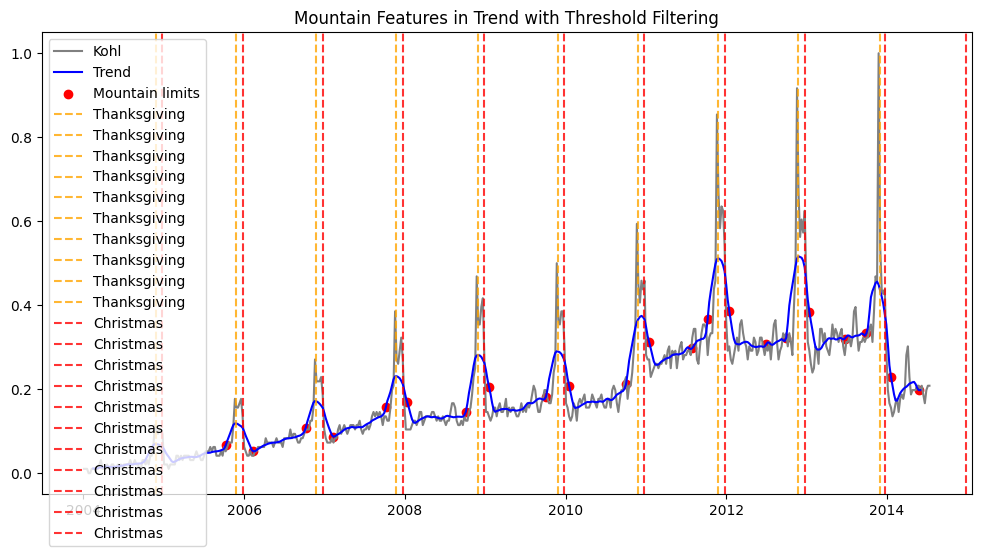

Mountain Indices: DatetimeIndex(['2005-10-09', '2006-02-12', '2006-10-08', '2007-02-11',
               '2007-10-07', '2008-01-13', '2008-10-05', '2009-01-18',
               '2009-10-04', '2010-01-17', '2010-10-03', '2011-01-16',
               '2011-07-31', '2011-10-09', '2012-01-15', '2012-07-01',
               '2012-09-30', '2013-01-13', '2013-06-23', '2013-09-29',
               '2014-01-19', '2014-05-25'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

def plot_trend_with_mountain_limits(kohls_ds, trend, trend_df, thanksgivings, cyber_mondays, christmas=True, delta=9):
    """
    Dibuja un gráfico que incluye los puntos detectados como "mountain limits" y líneas verticales
    para Thanksgivings, Cyber Mondays y Christmas.

    Args:
    - kohls_ds: DataFrame con los datos originales.
    - trend: Serie con la tendencia (sin NaNs).
    - trend_df: DataFrame alineado con el índice de `kohls_ds`.
    - thanksgivings: Lista de fechas de Thanksgiving.
    - cyber_mondays: Lista de fechas de Cyber Monday.
    - christmas: Booleano para incluir líneas de Christmas (25 de diciembre).
    - delta: Mínima distancia entre puntos consecutivos detectados como "mountain limits".
    """
    # Eliminar valores NaN de la tendencia
    trend = trend[~np.isnan(trend)]

    # Cálculo de diferencias
    d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
    dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

    # Establecer un umbral basado en la segunda derivada
    dd_threshold = np.nanstd(dd_trend_t) * 0.8  # Ajusta el multiplicador según la sensibilidad deseada

    # Detectar límites iniciales
    raw_mountain_limits = [
        i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
        if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
    ]

    # Filtrar por la distancia mínima entre índices
    mountain_limits = [raw_mountain_limits[0]]
    for idx in raw_mountain_limits[1:]:
        if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
            mountain_limits.append(idx)

    # Convertir índices numéricos en índices temporales
    mountain_limits_indices = trend_df.index[mountain_limits]

    # Configuración de la gráfica
    plt.figure(figsize=(12, 6))
    plt.plot(kohls_ds.index, kohls_ds['volume'], label='Kohl', color='gray')
    plt.plot(trend_df.index, trend_df, label='Trend', color='blue')
    plt.scatter(mountain_limits_indices, trend[mountain_limits], color='red', label='Mountain limits')

    # Dibujar líneas verticales para Thanksgivings y Cyber Mondays
    if thanksgivings is not None:
        for thanksgiving in thanksgivings:
            plt.axvline(x=thanksgiving, color='orange', linestyle='--', alpha=0.8, label='Thanksgiving')
    if cyber_mondays is not None:
        for cyber_monday in cyber_mondays:
            plt.axvline(x=cyber_monday, color='green', linestyle='--', alpha=0.8, label='Cyber Monday')

    # Dibujar líneas verticales para Christmas (25 de diciembre)
    if christmas:
        # Generar las fechas de Navidad para los años del índice de kohls_ds
        christmas_dates = [
            pd.Timestamp(year=year, month=12, day=25)
            for year in range(kohls_ds.index[0].year, kohls_ds.index[-1].year + 1)
        ]
        for christmas_date in christmas_dates:
            plt.axvline(x=christmas_date, color='red', linestyle='--', alpha=0.8, label='Christmas')

    # Ajustes finales
    plt.legend()
    plt.title("Mountain Features in Trend with Threshold Filtering")
    plt.show()

    # Imprimir los índices detectados
    print("Mountain Indices:", mountain_limits_indices)

# Uso de la función
plot_trend_with_mountain_limits(
    kohls_ds=kohls_ds,
    trend=trend,
    trend_df=trend_df,
    thanksgivings=thanksgivings,
    cyber_mondays=None,
    christmas=True,
    delta=9
)


In [ ]:
def plot_subsequence(
    TA, sequence_i, subsequence_len, dots=False, sequence_flag=False,
    save_plot=False, plot_path="./images", plot_resolution=10, resalt=True,
    anchor_pos=(1.25, 0.5), legend_loc="center right", anchor_right=0.9, legend_size=8
):
    """
    Plots subsequences of a given time series.

    Parameters:
    - TA (array-like): The full time series.
    - sequence_i (list): Indices where each subsequence starts.
    - subsequence_len (int): Length of each subsequence.
    - dots (bool): If True, plot points instead of lines.
    - sequence_flag (bool): If True, plot the full sequence as background.
    - save_plot (bool): If True, saves the plot to the specified path.
    - plot_path (str): Directory to save the plot if `save_plot` is True.
    - plot_resolution (int): Resolution (DPI) for saving the plot.
    - resalt (bool): Whether to highlight the extracted subsequences.
    - anchor_pos (tuple): Positioning for the legend.
    - legend_loc (str): Legend location.
    - anchor_right (float): Adjusts legend positioning.
    - legend_size (int): Font size of the legend.
    """

    plt.figure(figsize=(12, 6))

    # Plot the entire sequence as background (if enabled)
    if sequence_flag:
        plt.plot(TA, color="gray", alpha=0.3, label="Full Time Series")

    # Loop through subsequences and plot them
    for i, start in enumerate(sequence_i):
        end = start + subsequence_len
        if end > len(TA):
            continue  # Skip if the subsequence would exceed the time series length

        # Extract subsequence
        subseq = TA[start:end]

        # Choose plotting style
        if dots:
            plt.scatter(range(start, end), subseq, label=f"Subsequence {i+1}", s=10)
        else:
            plt.plot(range(start, end), subseq, label=f"Subsequence {i+1}")

    # Adjusting plot aesthetics
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title("Highlighted Subsequences in Time Series")

    # Legend placement
    plt.legend(loc=legend_loc, fontsize=legend_size)

    # Save or show plot
    if save_plot:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)  # Create directory if it doesn't exist
        plt.savefig(os.path.join(plot_path, "subsequence_plot.png"), dpi=plot_resolution)
        plt.close()
    else:
        plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_subsequence(
    TA, sequence_i, subsequence_len, dots=False, sequence_flag=False,
    save_plot=False, plot_path="./images", plot_resolution=10, resalt=True,
    anchor_pos=(1.25, 0.5), legend_loc="center right", anchor_right=0.9, legend_size=8
):
    """
    Plots subsequences of a given time series.

    Parameters:
    - TA (array-like): The full time series.
    - sequence_i (list): Indices where each subsequence starts.
    - subsequence_len (int): Length of each subsequence.
    - dots (bool): If True, plot points instead of lines.
    - sequence_flag (bool): If True, plot the full sequence as background.
    - save_plot (bool): If True, saves the plot to the specified path.
    - plot_path (str): Directory to save the plot if `save_plot` is True.
    - plot_resolution (int): Resolution (DPI) for saving the plot.
    - resalt (bool): Whether to highlight the extracted subsequences.
    - anchor_pos (tuple): Positioning for the legend.
    - legend_loc (str): Legend location.
    - anchor_right (float): Adjusts legend positioning.
    - legend_size (int): Font size of the legend.
    """

    plt.figure(figsize=(12, 6))

    # Plot the entire sequence as background (if enabled)
    if sequence_flag:
        plt.plot(TA, color="gray", alpha=0.3, label="Full Time Series")

    # Loop through subsequences and plot them
    for i, start in enumerate(sequence_i):
        end = start + subsequence_len
        if end > len(TA):
            continue  # Skip if the subsequence would exceed the time series length

        # Extract subsequence
        subseq = TA[start:end]

        # Choose plotting style
        if dots:
            plt.scatter(range(start, end), subseq, label=f"Subsequence {i+1}", s=10)
        else:
            plt.plot(range(start, end), subseq, label=f"Subsequence {i+1}")

    # Adjusting plot aesthetics
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title("Highlighted Subsequences in Time Series")

    # Legend placement
    plt.legend(loc=legend_loc, fontsize=legend_size)

    # Save or show plot
    if save_plot:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)  # Create directory if it doesn't exist
        plt.savefig(os.path.join(plot_path, "subsequence_plot.png"), dpi=plot_resolution)
        plt.close()
    else:
        plt.show()


Parece que se cogen bien y el tamaño puede tener sentido. Podemos verificar el tamaño de ventana adecuado usando Fourier

In [ ]:
from aeon.segmentation._clasp import find_dominant_window_sizes

[find_dominant_window_sizes Code](https://github.com/aeon-toolkit/aeon/blob/main/aeon/segmentation/_clasp.py#L17)


In [ ]:
dominant_period_size = find_dominant_window_sizes(
    X = kohls_ds['volume'].values,
    offset = 0.05
)
print(f"Dominant Period: {dominant_period_size}")

Dominant Period: 13


Let's modify the function to check more sizes in case it is a near one

In [ ]:
def find_dominant_window_sizes(X, offset=0.05, nsizes=1):
    """Determine the Window-Sizes using dominant FFT-frequencies.

    Parameters
    ----------
    X : array-like, shape=[n]
        A single univariate time series of length n.
    offset : float
        Exclusion Radius.
    nsizes : int
        Number of dominant window sizes to return.

    Returns
    -------
    dominant_window_sizes : array
        Array of the top `nsizes` window sizes based on FFT frequencies.
    """
    fourier = np.absolute(np.fft.fft(X))
    freqs = np.fft.fftfreq(X.shape[0], 1)

    coefs = []
    window_sizes = []

    for coef, freq in zip(fourier, freqs):
        if coef and freq > 0:
            coefs.append(coef)
            window_sizes.append(1 / freq)

    coefs = np.array(coefs)
    window_sizes = np.asarray(window_sizes, dtype=np.int64)

    idx = np.argsort(coefs)[::-1]  # Índices ordenados por coeficientes en orden descendente

    # Filtrar por rango válido y tomar las mejores `nsizes` ventanas
    valid_window_sizes = [
        int(window_size)
        for window_size in window_sizes[idx]
        if window_size in range(20, int(X.shape[0] * offset))
    ]

    return valid_window_sizes[:nsizes] if valid_window_sizes else window_sizes[idx[:nsizes]]


In [ ]:
dominant_period_sizes = find_dominant_window_sizes(
    X = kohls_ds['volume'].values,
    offset = 0.05,
    nsizes = 5
)
print(f"Dominant Periods: {dominant_period_sizes}")

Dominant Periods: [26, 25, 23, 22, 21]
